<a href="https://colab.research.google.com/github/Maxim687/Machine-learning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_2_1_%D0%A2%D0%B8%D0%BC%D0%BE%D1%89%D1%83%D0%BA_%E2%84%9627.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Завдання 1
# Вивести перших 5 рядків.

file_path = '/content/drive/My Drive/titanic (2).csv'
df = pd.read_csv(file_path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Завдання 2
# Визначити розмір датасета.

df.shape

(418, 12)

In [ ]:
# Завдання 3
# Визначити тип даних.

df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
# Завдання 4
# Визначити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()))

In [ ]:
# Завдання 5
# Ще раз перевірити наявність пропущених значень.

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Завдання 6
# Перевірити наявність дублікатів. При наявності видалити дублікати.

duplicate_count = df.duplicated().sum()

df.drop_duplicates(inplace=True)

duplicate_count_after = df.duplicated().sum()

duplicate_count, duplicate_count_after

(0, 0)

In [ ]:
# Завдання 7
# Вивести описову статистику датасету describe().

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Завдання 8
# Видалити стовпчик Cabin.

df.drop(columns=['Cabin'], inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
# Завдання 9
# Сформувати датасет з обраними стовпцями:['Survived', 'Pclass', 'Sex', 'Age', 'Fare'].

# Вибір стовпців
df_selected = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

df_selected.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [ ]:
# Завдання 10
# Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні значення даного стовпчика).

df_selected['Sex'].unique()

df_selected.loc[df_selected['Sex'] == 'male', 'Sex'] = 0
df_selected.loc[df_selected['Sex'] == 'female', 'Sex'] = 1

df_selected['Sex'].unique()

array([0, 1], dtype=object)

In [ ]:
# Завдання 11
# Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає).

df_selected.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


In [ ]:
# Завдання 12
# Вивести 5 перших рядків датасету.

df_selected.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


In [ ]:
# Завдання 13
# Вивести 5 останніх рядків датасету.

df_selected.tail()

,Survived,Pclass,Sex,Age,Fare
413,0,3,0,30.27259,8.0500
414,1,1,1,39.00000,108.9000
415,0,3,0,38.50000,7.2500
416,0,3,0,30.27259,8.0500
417,0,3,0,30.27259,22.3583


In [ ]:
# Завдання 14
# Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі. Чи була різниця у виживанні між чоловіками та жінками?

survival_by_sex = df_selected.groupby('Sex')['Survived'].mean() * 100

survival_by_sex

# Так, є суттєва різниця між вижившими чоловіками та жінками

,Survived
Sex,
0,0.0
1,100.0


In [ ]:
# Завдання 15
# Обчисліть відсоток виживання для кожного класу (Pclass). Який клас мав найвищий рівень виживання (дати відповідь)?

survival_by_class = df_selected.groupby('Pclass')['Survived'].mean() * 100

highest_survival_class = survival_by_class.idxmax()

survival_by_class, highest_survival_class

# Перший клас має найвищий рівень виживання

(Pclass
 1    46.728972
 2    32.258065
 3    33.027523
 Name: Survived, dtype: float64,
 1)

In [ ]:
# Завдання 16
# Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи впливає вік на виживання (дати відповідь)?

average_age_survived = df_selected.groupby('Survived')['Age'].mean()

average_age_survived

# Оскільки середні віки для обох груп дуже близькі один до одного, це свідчить про те, що вік не має значного впливу на ймовірність виживання в цьому випадку.

,Age
Survived,
0,30.272699
1,30.272400


In [ ]:
# Завдання 17
# Розподіліть пасажирів на групи за рівнями тарифів (Fare) і обчисліть рівень виживання для кожної групи. Як тариф впливав на шанси виживання (дати відповідь)?

df_selected.loc[:, 'FareGroup'] = pd.qcut(df_selected['Fare'], 4)

survival_by_fare_group = df_selected.groupby('FareGroup')['Survived'].mean() * 100

survival_by_fare_group

# Рівень виживання збільшується зі збільшенням вартості квитка.

<ipython-input-45-c7c0b57c1278>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'FareGroup'] = pd.qcut(df_selected['Fare'], 4)
<ipython-input-45-c7c0b57c1278>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_group = df_selected.groupby('FareGroup')['Survived'].mean() * 100


,Survived
FareGroup,
"(-0.001, 7.896]",26.315789
"(7.896, 14.454]",27.083333
"(14.454, 31.5]",39.047619
"(31.5, 512.329]",53.398058


In [ ]:
# Завдання 18
# Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу (Pclass). Чи існує значна різниця у тарифах між класами (дати відповідь)?

average_fare_by_class = df_selected.groupby('Pclass')['Fare'].mean()

average_fare_by_class

# Існує значна різниця у тарифах між класами.

,Fare
Pclass,
1,94.280297
2,22.202104
3,12.565951


In [ ]:
# Завдання 19
# Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік пасажирів розподіляється за класами (дати відповідь)?

average_age_by_class = df_selected.groupby('Pclass')['Age'].mean()

average_age_by_class

# Середній вік пасажирів змінюється залежно від класу, пасажири 1-го класу є старшими в середньому порівняно з пасажирами 2-го і 3-го класу.

,Age
Pclass,
1,40.022928
2,28.857881
3,26.090397


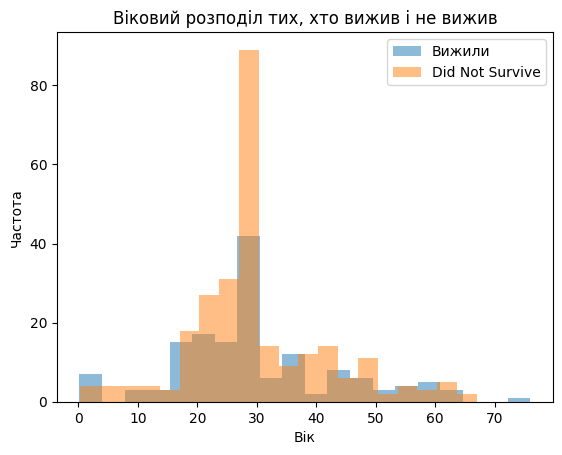

In [ ]:
# Завдання 20
# Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив. Чи є видимі відмінності у вікових групах (дати відповідь)?

import matplotlib.pyplot as plt

plt.hist(df_selected[df_selected['Survived'] == 1]['Age'], bins=20, alpha=0.5, label='Вижили')
plt.hist(df_selected[df_selected['Survived'] == 0]['Age'], bins=20, alpha=0.5, label='Не вижили')

plt.legend()
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.title('Віковий розподіл тих, хто вижив і не вижив')
plt.show()

# Видима відмінність того, що більше всього людей які не вижили віком 30 років.

In [ ]:
# Завдання 21
# Обчисліть відсоток виживання для кожної комбінації статі та класу (наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група мала найвищий рівень виживання (дати відповідь)?

survival_by_sex_class = df_selected.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
survival_by_sex_class

Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64

In [ ]:
# Завдання 22
# Обчисліть кореляцію між усіма числовими змінними (Survived, Pclass, Age, Fare). Які змінні найбільш сильно корелюють з виживанням (дати відповідь)?

correlation_matrix = df_selected[['Survived', 'Pclass', 'Age', 'Fare']].corr()

strongest_correlation = correlation_matrix['Survived'].abs().sort_values(ascending=False).iloc[1]

correlation_matrix, strongest_correlation

# Найсильніше корелює з виживанням Fare (кореляція 0.19). Це свідчить про те, що пасажири, які платили вищі тарифи, мали трохи більші шанси на виживання.

(          Survived    Pclass       Age      Fare
 Survived  1.000000 -0.108615 -0.000011  0.191382
 Pclass   -0.108615  1.000000 -0.440782 -0.576619
 Age      -0.000011 -0.440782  1.000000  0.326800
 Fare      0.191382 -0.576619  0.326800  1.000000,
 0.19138247897510116)